Analysis of mappings in EmoBox

In [ ]:
!git clone --sparse https://github.com/emo-box/EmoBox.git
!cd EmoBox
!git sparse-checkout set "data/"
!git sparse-checkout reapply
!cd data

Cloning into 'EmoBox'...
remote: Enumerating objects: 787, done.
remote: Counting objects: 100% (787/787), done.
remote: Compressing objects: 100% (460/460), done.
remote: Total 787 (delta 332), reused 742 (delta 310), pack-reused 0 (from 0)
Receiving objects: 100% (787/787), 28.52 MiB | 7.54 MiB/s, done.
Resolving deltas: 100% (332/332), done.


In [66]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [50]:
def merge_label_maps(root_directory):
    """
    Merge label maps from all JSON label mapping files in subdirectories into a single dictionary.
    
    Args:
        root_directory (str): Path to the root directory containing subdirectories with label maps
        
    Returns:
        dict: Combined label map dictionary
    """
    merged_data = {}
    
    # Walk through all directories starting from root
    for root, _, files in os.walk(root_directory):
        # Find JSON files with mappingsin current directory
        json_files = [f for f in files if f.endswith('map.json') or f.endswith('dict.json')]
        for filename in json_files:
            filepath = os.path.join(root, filename) 
            try:
                with open(filepath, 'r', encoding='utf-8') as file:
                    data = json.load(file)
                    merged_data.update({root.strip('./'):data})
                    # print(f"Merged: {filepath}")
            except json.JSONDecodeError as e:
                print(f"Warning: Could not parse {filename}: {str(e)}")
            except Exception as e:
                print(f"Warning: Error reading {filename}: {str(e)}")
    
    return merged_data

In [51]:
emol = merge_label_maps('.')

In [53]:
emol['mead']

{'neutral': 'Neutral',
 'angry': 'Angry',
 'contempt': 'Contempt',
 'disgusted': 'Disgusted',
 'fear': 'Fear',
 'happy': 'Happy',
 'sad': 'Sad',
 'surprised': 'Surprised'}

In [54]:
new_df = pd.DataFrame(
    [(source, orig, std) for source, labels in emol.items() for orig, std in labels.items()],
    columns=["source", "Original_Label", "Standardized_Label"]
)

In [29]:
new_df = pd.DataFrame([(k, v) for d in emol for k, v in d.items()], columns=['Original', 'Standardized'])

In [69]:
pd.DataFrame(new_df['Original_Label'].value_counts()).head(7)

,count
Original_Label,
sad,10
neutral,10
happy,9
angry,8
fear,8
Neutral,7
disgust,6


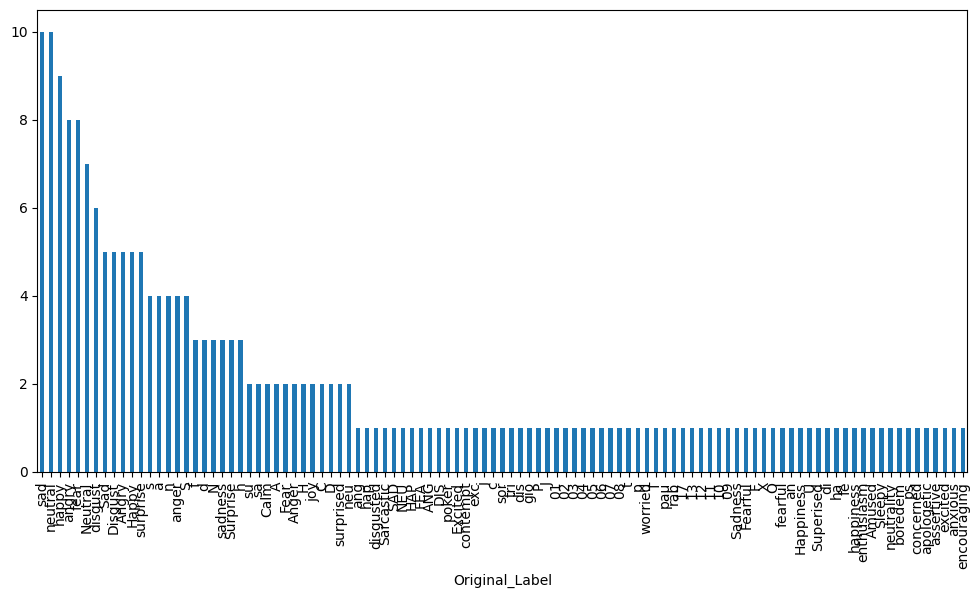

In [70]:
plt.figure(figsize=(12, 6)) 
new_df['Original_Label'].value_counts().plot.bar()
plt.show()


In [59]:
new_df.tail(17)

,source,Original_Label,Standardized_Label
196,tess,fear,Fear
197,tess,disgust,Disgust
198,tess,angry,Angry
199,tess,sad,Sad
200,tess,ps,Surprise
201,tess,neutral,Neutral
202,tess,happy,Happy
203,jlcorpus,concerned,Concerned
204,jlcorpus,apologetic,Apologetic
205,jlcorpus,angry,Angry


In [61]:
pd.DataFrame(new_df['Standardized_Label'].value_counts()).head(12)

,count
Standardized_Label,
Sad,30
Neutral,29
Happy,29
Angry,29
Fear,23
Disgust,20
Surprise,17
Contempt,2
Excited,2


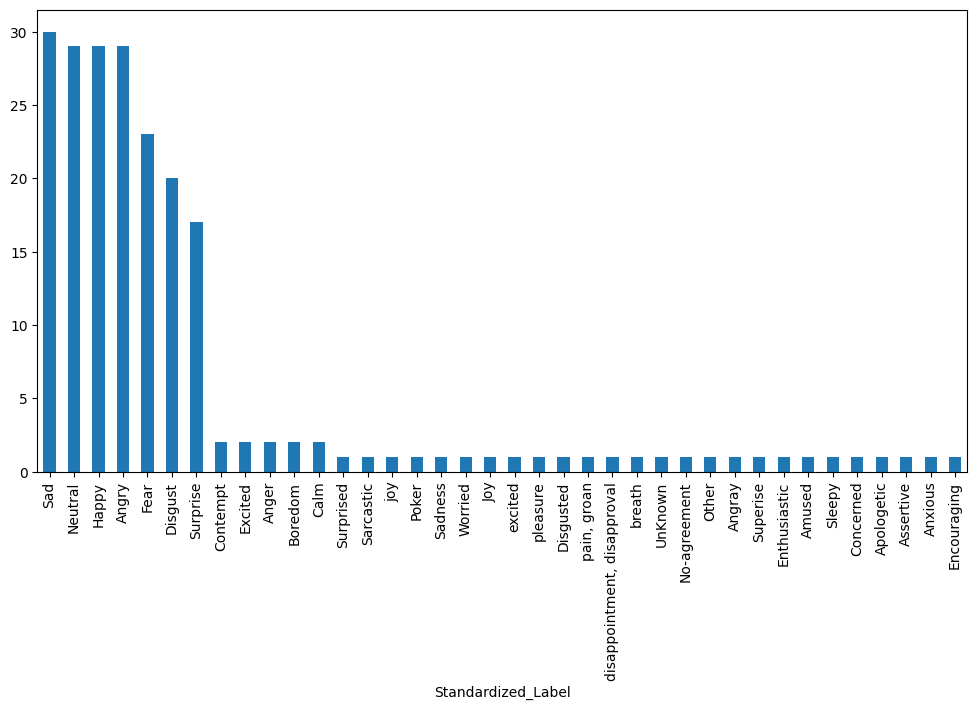

In [71]:
plt.figure(figsize=(12, 6)) 
new_df['Standardized_Label'].value_counts().plot.bar()
plt.show()